In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


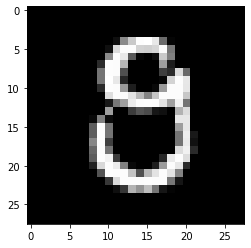

In [3]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[80],cmap='gray')

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [7]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)


##Goal : 99.4% within 20 epochs, 15K params, without use of any bias

##Starting Model

Observations about the model--

1. First 1x1 convolutional happening before MaxPool2D. Doesn't really go with the lectures. Intuitively, 1x1 conv layer acts like an average over channel space and max pool acts like "average" over widht and height. So, there shouldn't be a reason to prefer one over another but let's check it by swaping the layer in the next model
2. Dropout is added just before softmax. This is not required as this will drop the output neurons for certain classes. We will remove this in future models.
3. Overall architecture seems to bank on generating 32 complex features at 5x5 RF and then keep on extracting 16 complex features over ever increasing receptive fields. I guess for MNIST, we won't need to extract as many complex features. We could reduce the 16 channel conv layers or may reduce the number of channels in each of them. Let's experiment
4. Learning rate scheduler also adds another dimension to the model. We could try to first model without the scheduler. Add scheduler only when we see a lot of fluctuations in the accuracy/loss batch on batch basis
5. Large Batch size -- Batch Size tends to approximate the gradient. Although expectation of gradient is still the same for all batch sizes, variance changes a lot. We will experiment with batch sizes as well 




1. Starting Model: Number of Params ~ 16K


In [10]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3, activation='relu')) #24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu')) #22

model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(16, 3, 3, activation='relu'))#9
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu'))#7
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu'))#5
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu'))#3
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(10, 4, 4))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_8 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_9 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 10)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4))`


In [22]:

def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 10s 164us/step - loss: 0.0992 - acc: 0.9548 - val_loss: 0.0300 - val_acc: 0.9917
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 6s 104us/step - loss: 0.0942 - acc: 0.9565 - val_loss: 0.0252 - val_acc: 0.9931
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 6s 103us/step - loss: 0.0885 - acc: 0.9578 - val_loss: 0.0196 - val_acc: 0.9945
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 6s 103us/step - loss: 0.0877 - acc: 0.9592 - val_loss: 0.0179 - val_acc: 0.9948
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [=====

In [23]:

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.01830523425960564, 0.9949]


Second Model

Let's get rid of last dropout before the softmax as it is creating unnecessary nuisance in terms of interpreting the training loss and training accuracy. Let's also save our model progress using history

In [24]:
model1 = Sequential()
 
model1.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model1.add(BatchNormalization())
model1.add(Dropout(0.1))

model1.add(Convolution2D(32, 3, 3, activation='relu')) #24
model1.add(BatchNormalization())
model1.add(Dropout(0.1))

model1.add(Convolution2D(10, 1, 1, activation='relu')) #22

model1.add(MaxPooling2D(pool_size=(2, 2)))#11

model1.add(Convolution2D(16, 3, 3, activation='relu'))#9
model1.add(BatchNormalization())
model1.add(Dropout(0.1))


model1.add(Convolution2D(16, 3, 3, activation='relu'))#7
model1.add(BatchNormalization())
model1.add(Dropout(0.1))


model1.add(Convolution2D(16, 3, 3, activation='relu'))#5
model1.add(BatchNormalization())
model1.add(Dropout(0.1))


model1.add(Convolution2D(16, 3, 3, activation='relu'))#3
model1.add(BatchNormalization())
model1.add(Dropout(0.1))


model1.add(Convolution2D(10, 4, 4))
model1.add(BatchNormalization())


model1.add(Flatten())
model1.add(Activation('softmax'))


model1.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_36 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_34 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_37 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_35 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 24, 24, 10)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4))`


In [25]:

model1.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

history1=model1.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 10s 167us/step - loss: 0.3789 - acc: 0.9319 - val_loss: 0.0861 - val_acc: 0.9835
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 6s 102us/step - loss: 0.1083 - acc: 0.9810 - val_loss: 0.0500 - val_acc: 0.9895
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 6s 101us/step - loss: 0.0735 - acc: 0.9849 - val_loss: 0.0410 - val_acc: 0.9918
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 6s 101us/step - loss: 0.0594 - acc: 0.9871 - val_loss: 0.0355 - val_acc: 0.9919
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [=====



Analysis --
Model does a good job of minimizing the generalization error. The validation accuracy and training accuracy matches almost perfectly at 19th epoch. Validation accuracy goes above a bit more in the 20th epoch but I guess thats an artifact of dropout layer being active for training. 

what next?
Let's swap the 1x1 conv and maxpool layer to see it makes a difference


In [26]:
model2 = Sequential()
 
model2.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model2.add(BatchNormalization())
model2.add(Dropout(0.1))

model2.add(Convolution2D(32, 3, 3, activation='relu')) #24
model2.add(BatchNormalization())
model2.add(Dropout(0.1))
model2.add(MaxPooling2D(pool_size=(2, 2)))#11

model2.add(Convolution2D(10, 1, 1, activation='relu')) #22


model2.add(Convolution2D(16, 3, 3, activation='relu'))#9
model2.add(BatchNormalization())
model2.add(Dropout(0.1))


model2.add(Convolution2D(16, 3, 3, activation='relu'))#7
model2.add(BatchNormalization())
model2.add(Dropout(0.1))


model2.add(Convolution2D(16, 3, 3, activation='relu'))#5
model2.add(BatchNormalization())
model2.add(Dropout(0.1))


model2.add(Convolution2D(16, 3, 3, activation='relu'))#3
model2.add(BatchNormalization())
model2.add(Dropout(0.1))


model2.add(Convolution2D(10, 4, 4))
model2.add(BatchNormalization())


model2.add(Flatten())
model2.add(Activation('softmax'))


model2.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="rel

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_43 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_40 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_44 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_41 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 32)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4))`


In [27]:

model2.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

history2=model2.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 11s 177us/step - loss: 0.3653 - acc: 0.9340 - val_loss: 0.0802 - val_acc: 0.9846
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 6s 102us/step - loss: 0.1059 - acc: 0.9812 - val_loss: 0.0503 - val_acc: 0.9895
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 6s 102us/step - loss: 0.0736 - acc: 0.9847 - val_loss: 0.0372 - val_acc: 0.9913
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 6s 104us/step - loss: 0.0578 - acc: 0.9872 - val_loss: 0.0444 - val_acc: 0.9888
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [=====

In [35]:
history1.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])

In [0]:
def plotting_history(hist,title=''):
  fig,axs=plt.subplots(1,2,figsize=(20,8))
  axs = axs.ravel()
  axs[0].plot(hist.history['acc'],label='Training')
  axs[0].plot(hist.history['val_acc'],label='Validation')
  axs[0].set_xlabel('Epochs')
  axs[0].set_ylabel('Accuracy')
  axs[0].legend(loc='best')
  axs[1].plot(hist.history['loss'],label='Training')
  axs[1].plot(hist.history['val_loss'],label='Validation')
  axs[1].set_xlabel('Epochs')
  axs[1].set_ylabel('Loss')
  axs[1].legend(loc='best')
  fig.suptitle(title)
  plt.show()



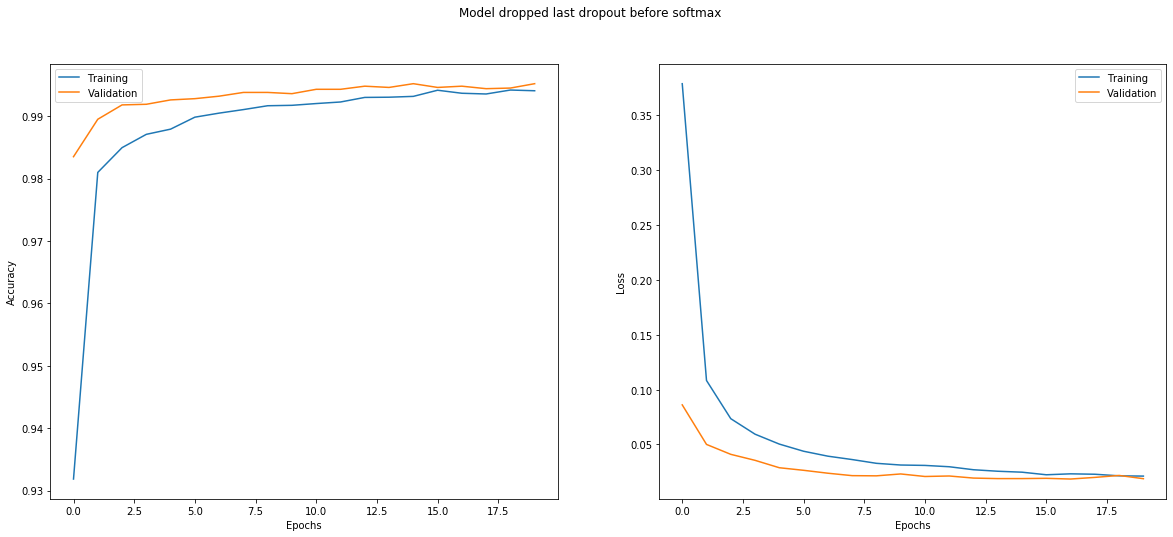

In [69]:
plotting_history(history1,title='Model dropped last dropout before softmax')

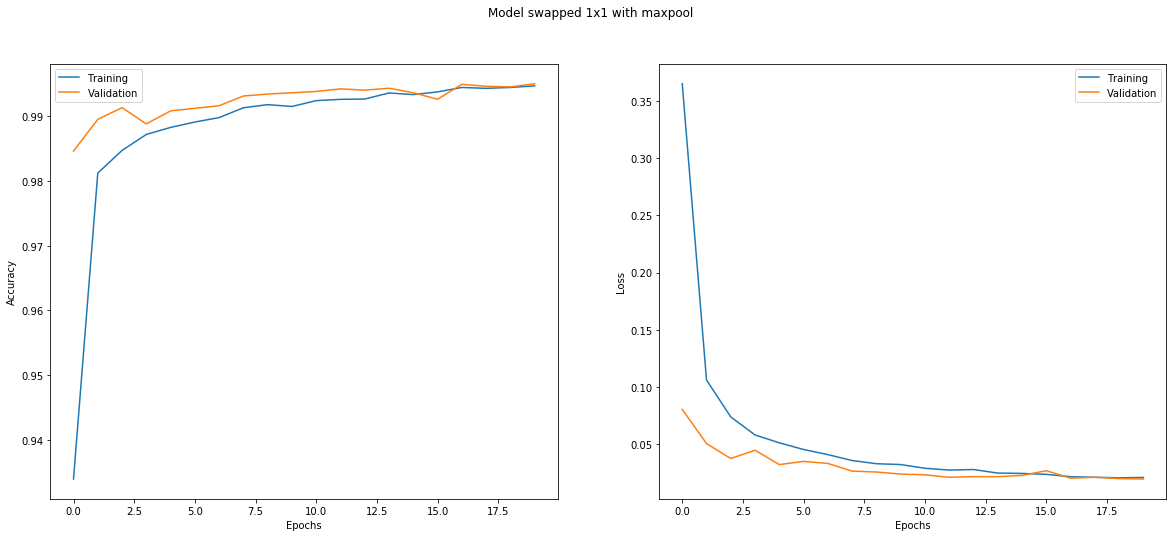

In [76]:
plotting_history(history2,title='Model swapped 1x1 with maxpool')

##Third Model ~ 14.75K Parameters

Reducing the neurons in last 16 convolution layer to 10units

In [74]:
model3 = Sequential()
 
model3.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model3.add(BatchNormalization())
model3.add(Dropout(0.1))

model3.add(Convolution2D(32, 3, 3, activation='relu')) #24
model3.add(BatchNormalization())
model3.add(Dropout(0.1))
model3.add(MaxPooling2D(pool_size=(2, 2)))#12

model3.add(Convolution2D(10, 1, 1, activation='relu')) #12

model3.add(Convolution2D(16, 3, 3, activation='relu'))#10
model3.add(BatchNormalization())
model3.add(Dropout(0.1))


model3.add(Convolution2D(16, 3, 3, activation='relu'))#8
model3.add(BatchNormalization())
model3.add(Dropout(0.1))


model3.add(Convolution2D(16, 3, 3, activation='relu'))#6
model3.add(BatchNormalization())
model3.add(Dropout(0.1))


model3.add(Convolution2D(10, 3, 3, activation='relu'))#4
model3.add(BatchNormalization())
model3.add(Dropout(0.1))


model3.add(Convolution2D(10, 4, 4))
model3.add(BatchNormalization())


model3.add(Flatten())
model3.add(Activation('softmax'))


model3.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-pac

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_80 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_69 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_63 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_70 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_64 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 32)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4))`


In [75]:

model3.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

history3=model3.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 13s 210us/step - loss: 0.4111 - acc: 0.9199 - val_loss: 0.0980 - val_acc: 0.9798
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 6s 105us/step - loss: 0.1119 - acc: 0.9801 - val_loss: 0.0619 - val_acc: 0.9862
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 6s 106us/step - loss: 0.0777 - acc: 0.9836 - val_loss: 0.0541 - val_acc: 0.9867
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 6s 106us/step - loss: 0.0625 - acc: 0.9864 - val_loss: 0.0435 - val_acc: 0.9884
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [=====

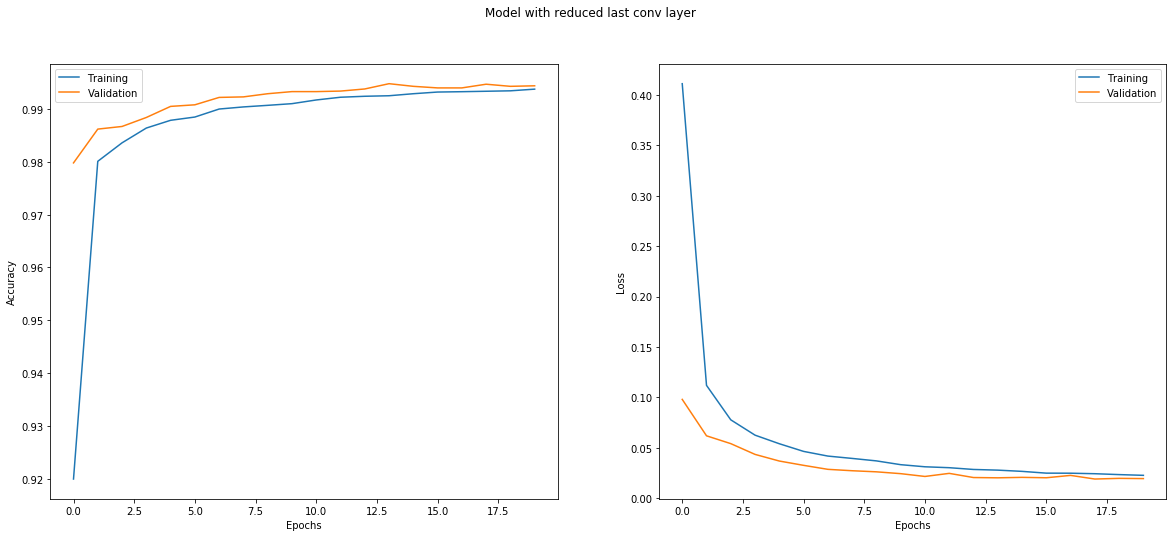

In [77]:
plotting_history(history3,title='Model with reduced last conv layer')

##Fourth Model ~ 13K Parameters

Let's reduce the neurons in second last layer as well

In [26]:
model4 = Sequential()
 
model4.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model4.add(BatchNormalization())
model4.add(Dropout(0.1))

model4.add(Convolution2D(32, 3, 3, activation='relu')) #24
model4.add(BatchNormalization())
model4.add(Dropout(0.1))
model4.add(MaxPooling2D(pool_size=(2, 2)))#12

model4.add(Convolution2D(10, 1, 1, activation='relu')) #12

model4.add(Convolution2D(16, 3, 3, activation='relu'))#10
model4.add(BatchNormalization())
model4.add(Dropout(0.1))


model4.add(Convolution2D(16, 3, 3, activation='relu'))#8
model4.add(BatchNormalization())
model4.add(Dropout(0.1))


model4.add(Convolution2D(10, 3, 3, activation='relu'))#6
model4.add(BatchNormalization())
model4.add(Dropout(0.1))


model4.add(Convolution2D(10, 3, 3, activation='relu'))#4
model4.add(BatchNormalization())
model4.add(Dropout(0.1))


model4.add(Convolution2D(10, 4, 4))
model4.add(BatchNormalization())


model4.add(Flatten())
model4.add(Activation('softmax'))


model4.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-pac

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_57 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_49 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_58 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_50 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 32)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4))`


In [93]:
model4.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=Adam(lr=0.003))
history4=model4.fit(X_train,Y_train,batch_size=128,epochs=20,verbose=1,validation_data=(X_test,Y_test),callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 17s 278us/step - loss: 0.4151 - acc: 0.9191 - val_loss: 0.0894 - val_acc: 0.9818
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 6s 108us/step - loss: 0.1199 - acc: 0.9780 - val_loss: 0.0612 - val_acc: 0.9859
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 6s 106us/step - loss: 0.0823 - acc: 0.9829 - val_loss: 0.0454 - val_acc: 0.9898
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 6s 106us/step - loss: 0.0663 - acc: 0.9850 - val_loss: 0.0379 - val_acc: 0.9908
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [=====

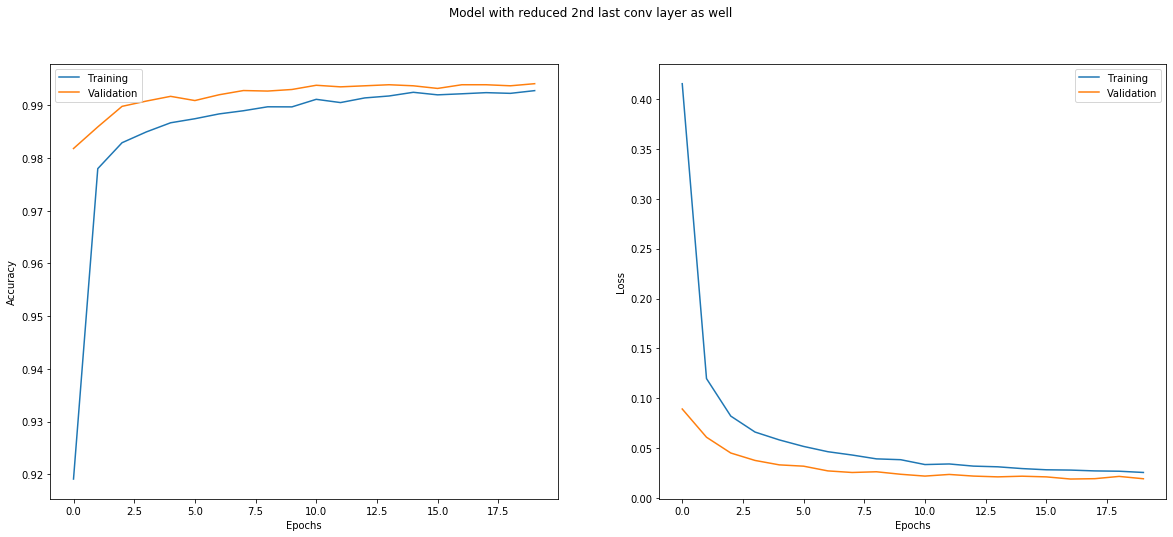

In [94]:
plotting_history(history4,title='Model with reduced 2nd last conv layer as well')

With reduced second last conv layer as well, we still achieve the 99.4 % accuracy. The validation accuracy and loss seemed to move in a jagged fashion. Lot of fluctuation. This could be because the loss surface has many kinks and many local minimas. How about we try to increase the batch size ?

In [98]:
model4.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=Adam(lr=0.003))
history5=model4.fit(X_train,Y_train,batch_size=256,epochs=20,verbose=1,validation_data=(X_test,Y_test),callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 15s 253us/step - loss: 0.5617 - acc: 0.8862 - val_loss: 0.1779 - val_acc: 0.9659
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 4s 64us/step - loss: 0.1744 - acc: 0.9751 - val_loss: 0.0896 - val_acc: 0.9853
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 4s 64us/step - loss: 0.1143 - acc: 0.9817 - val_loss: 0.0697 - val_acc: 0.9878
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 4s 64us/step - loss: 0.0885 - acc: 0.9848 - val_loss: 0.0695 - val_acc: 0.9864
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [========

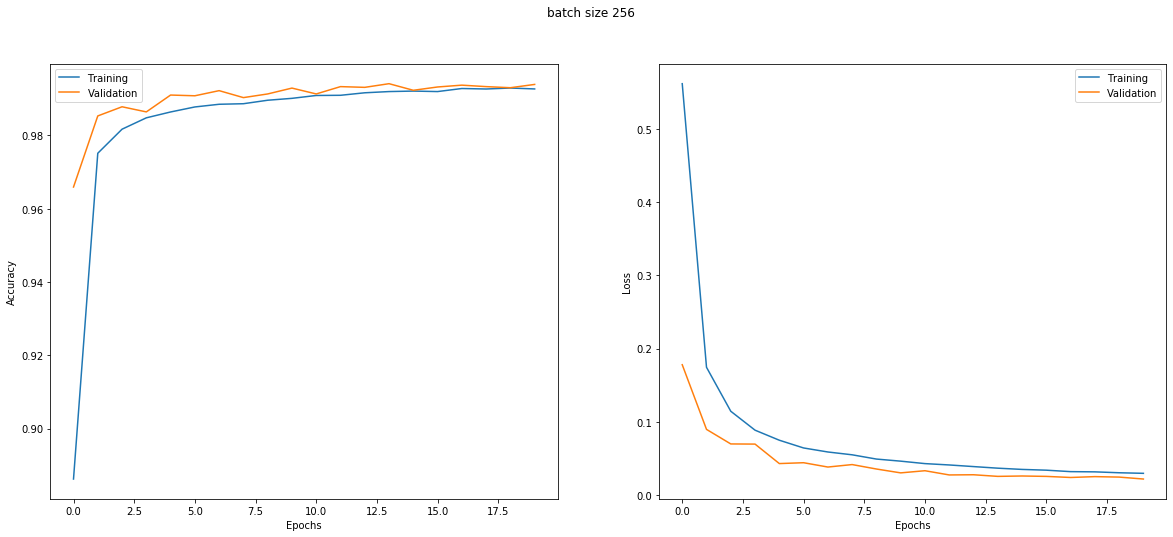

In [99]:
plotting_history(history5,"batch size 256")

In [101]:
model4.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=Adam(lr=0.003))
history6=model4.fit(X_train,Y_train,batch_size=64,epochs=20,verbose=1,validation_data=(X_test,Y_test),callbacks=[LearningRateScheduler(scheduler,verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 24s 408us/step - loss: 0.3201 - acc: 0.9343 - val_loss: 0.0928 - val_acc: 0.9746
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 12s 202us/step - loss: 0.1027 - acc: 0.9754 - val_loss: 0.0449 - val_acc: 0.9885
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 12s 201us/step - loss: 0.0776 - acc: 0.9805 - val_loss: 0.0319 - val_acc: 0.9908
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 12s 200us/step - loss: 0.0623 - acc: 0.9837 - val_loss: 0.0314 - val_acc: 0.9909
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [==

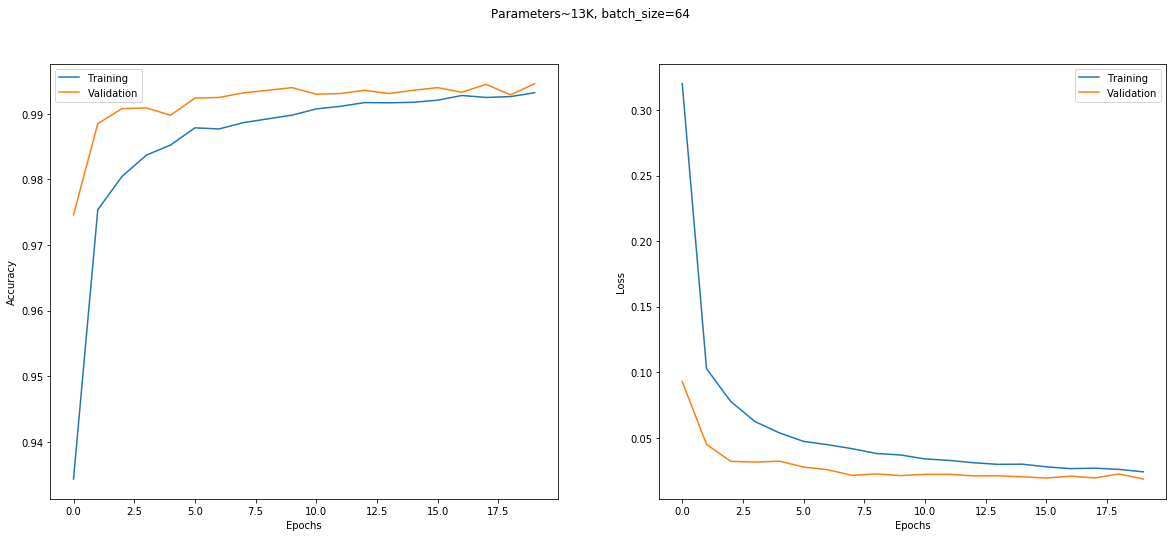

In [102]:
plotting_history(history6,title='Parameters~13K, batch_size=64')

##Fifth Model ~ 11K Parameters

Combining all the the learnings-- 
1. Swap 1x1 convolutional with MaxPool
2. Reduce the filter channels in every layer
3. Reduce the batch size to get out of local minimas. Small batch sizes can also add a bit of regularzation. 
 Although, it is possible to achieve 99.5% accuracy with 14.75K parameters, I streatched a bit further and achieved 99.41% with 11K Parameters. For 14.75K Parameters refer to Third Model

In [23]:
p=0.1
model = Sequential()
 
model.add(Convolution2D(14, 3, 3, activation='relu', input_shape=(28,28,1),use_bias=False)) #26
model.add(BatchNormalization())
model.add(Dropout(p))

model.add(Convolution2D(28, 3, 3, activation='relu',use_bias=False)) #24
model.add(BatchNormalization())
model.add(Dropout(p))
model.add(MaxPooling2D(pool_size=(2, 2)))#12

model.add(Convolution2D(10, 1, 1, activation='relu',use_bias=False)) #12

model.add(Convolution2D(14, 3, 3, activation='relu',use_bias=False))#10
model.add(BatchNormalization())
model.add(Dropout(p))


model.add(Convolution2D(14, 3, 3, activation='relu',use_bias=False))#8
model.add(BatchNormalization())
model.add(Dropout(p))


model.add(Convolution2D(14, 3, 3, activation='relu',use_bias=False))#6
model.add(BatchNormalization())
model.add(Dropout(p))


model.add(Convolution2D(14, 3, 3, activation='relu',use_bias=False))#4
model.add(BatchNormalization())
model.add(Dropout(p))


model.add(Convolution2D(10, 4, 4,use_bias=False))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(14, (3, 3), activation="relu", input_shape=(28, 28, 1..., use_bias=False)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(28, (3, 3), activation="relu", use_bias=False)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu", use_bias=False)`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(14, (3, 3), activation="relu", use_bias=False)`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(14, (3, 3), activatio

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 26, 26, 14)        126       
_________________________________________________________________
batch_normalization_50 (Batc (None, 26, 26, 14)        56        
_________________________________________________________________
dropout_43 (Dropout)         (None, 26, 26, 14)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 24, 24, 28)        3528      
_________________________________________________________________
batch_normalization_51 (Batc (None, 24, 24, 28)        112       
_________________________________________________________________
dropout_44 (Dropout)         (None, 24, 24, 28)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 28)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4), use_bias=False)`


In [25]:
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=Adam(lr=0.003))
history7=model.fit(X_train,Y_train,batch_size=128,epochs=5,verbose=1,validation_data=(X_test,Y_test),callbacks=[LearningRateScheduler(scheduler,verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 11s 186us/step - loss: 0.0447 - acc: 0.9867 - val_loss: 0.0322 - val_acc: 0.9907
Epoch 2/5

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 11s 182us/step - loss: 0.0347 - acc: 0.9896 - val_loss: 0.0263 - val_acc: 0.9917
Epoch 3/5

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
40064/60000 [===================>..........] - ETA: 3s - loss: 0.0292 - acc: 0.9911

KeyboardInterrupt: ignored

In [120]:

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.019954165014671163, 0.9945]


## Final Model
Having Tried to reduce model parameters till 11K parameters, it was found that to be really consistent with 99.4% accuracy, it is better to use model with 14.75K parameters-- the first model. 
 

In [31]:
p=0.1
model = Sequential()
 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1),use_bias=False)) #26
model.add(BatchNormalization())
model.add(Dropout(p))

model.add(Convolution2D(32, 3, 3, activation='relu',use_bias=False)) #24
model.add(BatchNormalization())
model.add(Dropout(p))
model.add(MaxPooling2D(pool_size=(2, 2)))#12

model.add(Convolution2D(10, 1, 1, activation='relu',use_bias=False)) #12

model.add(Convolution2D(16, 3, 3, activation='relu',use_bias=False))#10
model.add(BatchNormalization())
model.add(Dropout(p))


model.add(Convolution2D(16, 3, 3, activation='relu',use_bias=False))#8
model.add(BatchNormalization())
model.add(Dropout(p))


model.add(Convolution2D(16, 3, 3, activation='relu',use_bias=False))#6
model.add(BatchNormalization())
model.add(Dropout(p))


model.add(Convolution2D(10, 3, 3, activation='relu',use_bias=False))#4
model.add(BatchNormalization())
model.add(Dropout(p))


model.add(Convolution2D(10, 4, 4,use_bias=False))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1..., use_bias=False)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", use_bias=False)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu", use_bias=False)`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False)`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activatio

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_89 (Conv2D)           (None, 26, 26, 16)        144       
_________________________________________________________________
batch_normalization_78 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_67 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 24, 24, 32)        4608      
_________________________________________________________________
batch_normalization_79 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_68 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 12, 12, 32)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4), use_bias=False)`


In [32]:
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=Adam(lr=0.003))
history7=model.fit(X_train,Y_train,batch_size=128,epochs=20,verbose=1,validation_data=(X_test,Y_test),callbacks=[LearningRateScheduler(scheduler,verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 21s 346us/step - loss: 0.4043 - acc: 0.9218 - val_loss: 0.0909 - val_acc: 0.9825
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 11s 190us/step - loss: 0.1104 - acc: 0.9801 - val_loss: 0.0590 - val_acc: 0.9869
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 11s 191us/step - loss: 0.0745 - acc: 0.9847 - val_loss: 0.0565 - val_acc: 0.9863
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 11s 189us/step - loss: 0.0602 - acc: 0.9868 - val_loss: 0.0358 - val_acc: 0.9917
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [==